In [23]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 40

In [ ]:
df = pd.read_csv(r'C:\Users\jy34.kim\Desktop\liblab\git\data-analysis\c01.csv', encoding='cp932')
df = df[:980]

total = df.loc[df['都道府県名'].isin(['全国'])]
total.set_index(keys='西暦（年）', inplace=True)
total.index = total.index.astype(int).astype(str)
for t in total.columns:
    total[t] = pd.to_numeric(total[t],errors='coerce').fillna(total[t])

Text(0.5, 0.98, 'Total Population (Japan) ')

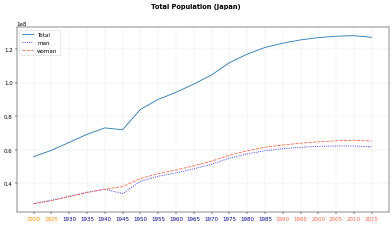

In [25]:
fg, ax = plt.subplots(figsize=(12,6))
ax.plot(total.index, total['人口（総数）'], label='Total')
ax.plot(total.index, total['人口（男）'], label='man', color='blue', linestyle=':')
ax.plot(total.index, total['人口（女）'], label='woman', color='tomato', linestyle='--')
ax.legend()

for x in ax.get_xticklabels():
    if x.get_text() <'1930':
        x.set_color('darkorange')
    if '1930'<= x.get_text() <'1990':
        x.set_color('darkblue')
    if '1990'<=x.get_text():
        x.set_color('tomato')

ax.grid(True, alpha=0.3)
fg.suptitle('Total Population (Japan) ', weight='bold')

In [ ]:
tk = df.loc[df['都道府県名'].str.contains('東京')]
tk.set_index(keys='西暦（年）', inplace=True)
tk.index = tk.index.astype(int).astype(str)
for c in tk.columns:
    tk[c] = pd.to_numeric(tk[c],errors='coerce').fillna(tk[c])    

Text(0.5, 0.98, 'Tokyo Population (Japan) ')

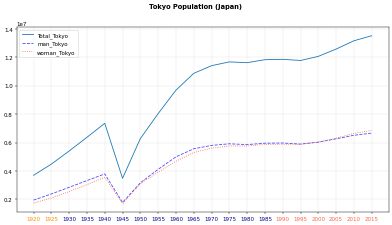

In [27]:
fg, ax = plt.subplots(figsize=(12, 6))
ax.plot(tk.index, tk['人口（総数）'], label='Total_Tokyo')
ax.plot(tk.index, tk['人口（男）'], linestyle='--', color='blue', label='man_Tokyo', alpha=0.7)
ax.plot(tk.index, tk['人口（女）'], linestyle=':', color='tomato', label='woman_Tokyo')

for x in ax.get_xticklabels():
    if x.get_text() <'1930':
        x.set_color('darkorange')
    if '1930'<= x.get_text() <'1990':
        x.set_color('darkblue')
    if '1990'<=x.get_text():
        x.set_color('tomato')

ax.legend()
ax.grid(True, alpha=0.3)
fg.suptitle('Tokyo Population (Japan) ', weight='bold')